### Sofisticated inference

In sofisticated inference the choice probability is computed in an iteartive way, using the following recursive relation for expected free energy 

\begin{equation}
\begin{split}
    G(u_\tau| o_{\leq\tau}, u_{<\tau}) &= - \ln p(u_{\tau}|u_{<\tau}) + E_{Q(o_{\tau+1}, s_{\tau+1}|u_{\leq\tau}. o_{<\tau})} \left[ \ln \frac{Q(s_{\tau+1}|u_{\leq\tau}, o_{<\tau})}{P(o_{\tau+1}, s_{\tau+1})} \right] \\ 
    &\:\:\: + E_{Q(o_{\tau+1}|u_{\leq\tau}, o_{\leq\tau}) Q(u_{\tau+1}|u_{< \tau + 1}, o_{\leq\tau+1})}\left[G(u_{\tau + 1}|o_{\leq \tau+1}, u_{<\tau+1} ) \right]\\ 
    Q(u_{\tau}|o_{\leq\tau}, u_{<\tau}) &= \text{softmax}(- G(u_{\tau}|o_{\leq\tau}, u_{<\tau})) \\ 
    G(u_T|o_{\leq T}, u_{< T}) &= - \ln p(u_{T}|u_{< T}) + E_{Q(o_{T+1}, s_{T+1}|u_{\leq T}, o_{< T})} \left[ \ln \frac{Q(s_{T+1}|u_{\leq T}, o_{< T})}{P(o_{T + 1}, s_{T + 1})} \right]
\end{split}
\end{equation}

where we use subscript $<k+1$, and $\leq k$ to denote a sequence of values including the step $k$.

Next we will establish an equivalence between the Bellman equation used in reinforcement learning literature and the recursive form of the expected free energy shown above. The Bellman equation can be expressed as  
\begin{equation}
  V(s) = \text{max}_{a \in A(s)} \left[F(s, a) + \beta E_{p(s^\prime|s, a)}[V(s^\prime)] \right] \equiv \text{max}_{a \in A(s)} Q(a, s)
\end{equation}
where $A(s)$ denotes a set of viable actions in state $s$. Hence, we can map local expected free energy, to Q-values as follows
\begin{equation}
  \begin{split}
    F(u_{\tau}, o_{\tau}) &= \ln p(u_{\tau}|u_{<\tau}) - E_{Q(o_{\tau+1}, s_{\tau+1}|u_{\leq\tau}. o_{<\tau})} \left[ \ln \frac{Q(s_{\tau+1}|u_{\leq\tau}, o_{<\tau})}{P(o_{\tau+1}, s_{\tau+1})} \right] \\ 
    \beta(o_{\tau +1}) &= Q (o_{\tau+1}|u_{\leq\tau}, o_{\leq\tau}) \\
    Q(u_{\tau}, o_{\tau}) &= F(u_{\tau}, o_{\tau}) + \sum_{o_{\tau+1}} \beta(o_{\tau+1}) V(o_{\tau+1}) \\
    p(u_{\tau}|o_{\tau}) &= \text{softmax}(\gamma Q(u_{\tau}, o_{\tau}) ) \\
    V(o_{\tau}) &= \sum_{u_\tau} p(u_{\tau}|o_{\tau}) Q(u_{\tau}, o_{\tau})
  \end{split}
\end{equation}

where we have replaced the 'max' operationa with a softmax parameterised with $\gamma$, and introduced a state dependent discount factor $\beta(o)$. Note that in sophisticated inference, as we describe a partially observable markov decision process (POMDP), one treats outcomes $o_t$ as states.

### Monte-Carlo Tree Search

Describe briefly Tree search and MCTS algorithms, and how one uses that to estimate choice probability $p(u_t|o_{\leq t}, u_{<t})$ for a given history of outcomes $o_{\leq t}$ and choices $u_{<t}$. 

### Discounting and sampling outcomes 

In a scenario where we have multi-modal outcomes, such that the likelihood probability is expressed as

$$ p(o_\tau|s_\tau) = \prod_m p(o_\tau^m|s_\tau), $$

the marginal probability over latent states $s_{tau}$ obtained as 

$$ p(o_\tau|u_{\tau-1}) = \sum_{s_\tau} \prod_m p(o_\tau^m|s_\tau) Q(s_{\tau}|u_{\tau-1})$$

will in general not be factorized over outcome modalities. Hence, to generate samples from this marginal, and consequently compute discount factor for the corresponding sample, one would have to deal with joint distributions over categoricals, which are memory intensive. Instead, here we will define an iterative sampling algorithm. Starting with a sample from the first modality $m=1$ 

\begin{equation}
o^{\prime 1}_\tau \sim p(o_\tau^1|u_{\tau-1})
\end{equation}

we can compute the conditional probability of the next modality $m=2$ and generate a sample as  

\begin{equation}
\begin{split}
     p(o_\tau^2|o_\tau^1=o^{\prime 1}_\tau, u_{\tau-1}) &= \sum_{s_\tau} p(o_\tau^m|s_\tau) w(o^{\prime 1}_\tau, s_{\tau}) Q(s_{\tau}|u_{\tau-1}) \\
     w(o^{\prime 1}_\tau, s_{\tau}) &= \frac{p(o_\tau^1=o^{\prime 1}_\tau|s_\tau)}{p(o_\tau^1=o^{\prime 1}_\tau|u_{\tau-1})} \\
    o^{\prime 2}_\tau &\sim p(o_\tau^2|o_\tau^1=o^{\prime 1}_\tau, u_{\tau-1})
\end{split}
\end{equation}

Hence, for the $m$th modality we can compute the conditional marginal, and generate a sample using the following relation

\begin{equation}
\begin{split}
     p(o_\tau^m|o_\tau^1=o^{\prime 1}_\tau, \ldots, o_\tau^{m-1}=o^{\prime m-1}_\tau, u_{\tau-1}) &= \sum_{s_\tau} p(o_\tau^m|s_\tau) w(o^{\prime 1}_\tau, \ldots, o^{\prime m-1}_\tau, s_{\tau}) Q(s_{\tau}|u_{\tau-1}) \\
     w(o^{\prime 1}_\tau, \ldots, o^{\prime m-1}_\tau, s_{\tau}) &= \frac{p(o_\tau^{m-1}=o^{\prime m-1}_\tau|s_\tau)}{p(o_\tau^{\prime m-1}|o_\tau^1=o^{\prime 1}_\tau, \ldots, o_\tau^{m-2}=o^{\prime m-2}_\tau, u_{\tau-1})} w(o^{\prime 1}_\tau, \ldots, o^{\prime m-2}_\tau, s_{\tau}) \\
    o^{\prime m}_\tau &\sim p(o_\tau^m|o_\tau^1=o^{\prime 1}_\tau, \ldots, o_\tau^{m-1}=o^{\prime m-1}_\tau, u_{\tau-1})
\end{split}
\end{equation}

In [1]:
import numpy as np 
import jax.numpy as jnp
import jax.tree_util as jtu
import mctx
from jax import random as jr
from jax.scipy.special import logsumexp

import numpy as np

from pymdp.jax.envs.generalized_tmaze import (
    GeneralizedTMazeEnv, parse_maze, render 
)

from pymdp.jax.envs.rollout import rollout
from pymdp.jax.agent import Agent as AIFAgent
from pymdp.jax.planning.mcts import mcts_policy_search

In [2]:
# make animation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from IPython.display import HTML

def animate(images, savefile=None):
    fig, ax = plt.subplots()

    sns.despine(fig, left=True, bottom=True)
    ax.set_xticks([])
    ax.set_yticks([])

    # ims is a list of lists, each row is a list of artists to draw in the
    # current frame; here we are just animating one artist, the image, in
    # each frame
    frames = []
    for i, img in enumerate(images):
        im = ax.imshow(img, animated=True)
        if i == 0:
            ax.imshow(img)  # show an initial one first
        frames.append([im])

    ani = animation.ArtistAnimation(fig, frames, interval=1000, blit=True,
                                    repeat_delay=1000)

    # To save the animation, use e.g.
    if savefile is not None:
        ani.save(savefile)

    plt.close(ani._fig)

    return ani

### Grid world (generalized TMaze) generative process

In this example we create a simple square environment, where multiple cues are present, and multiple reward pairs. Each cue indicates the location of one of the reward pairs. 

The agent is can move in the grid world using actions up, down, left and right, and observes the current tile it is at. 

The grid world is specified by a matrix using the following labels: 

```
0: Empty space
1: The initial position of the agent
2: Walls
3 + i: Cue for reward i
4 + i: Potential reward location i 1
4 + i: Potential reward location i 2
```

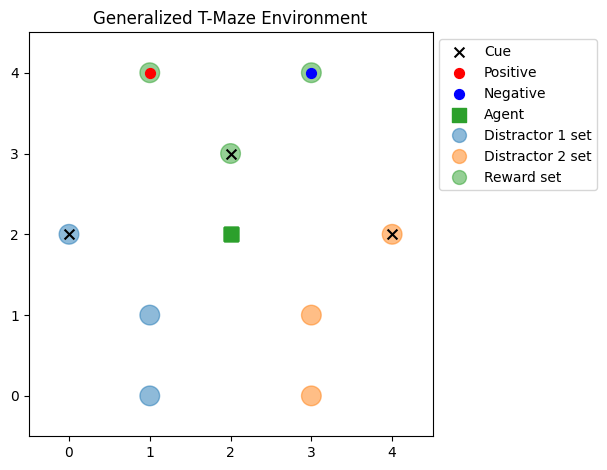

In [3]:
def get_maze_matrix(size='small'):
    if size == 'small':
        M = np.zeros((3, 5))

        # Set the reward locations
        M[0,1] = 4
        M[1,1] = 5
        M[1,3] = 7
        M[0,3] = 8

        # Set the cue locations
        M[2,0] = 3
        M[2,4] = 6

        # Set the initial position
        M[2,3] = 1
    
    elif size == 'medium':
        M = np.zeros((5, 5))

        # Set the reward locations
        M[0,1] = 4
        M[1,1] = 5
        M[1,3] = 7
        M[0,3] = 8
        M[4,1] = 10
        M[4,3] = 11

        # Set the cue locations
        M[2,0] = 3
        M[2,4] = 6
        M[3,2] = 9

        # Set the initial position
        M[2,2] = 1
    
    elif size == 'large':
        M = np.zeros((7, 5))

        # Set the reward locations
        M[0,1] = 4
        M[1,1] = 5
        M[1,3] = 7
        M[0,3] = 8
        M[5,1] = 10
        M[6,1] = 11
        M[5,3] = 13
        M[6,3] = 14

        # Set the cue locations
        M[2,0] = 3
        M[2,4] = 6
        M[4,0] = 9
        M[4,4] = 12

        # Set the initial position
        M[3,2] = 1
    
    else:
        M = np.zeros((10, 10))
        # Set the reward locations
        M[8,8] = 4
        M[8,7] = 5
        M[7,8] = 7
        M[6,8] = 8
        M[8,6] = 10
        M[7,7] = 11
        M[7,6] = 13
        M[6,7] = 14
        M[8,5] = 16
        M[5,8] = 17
        M[6,6] = 19
        M[6,5] = 20
        M[5,6] = 22
        M[5,7] = 23
        M[5,5] = 25
        M[5,4] = 26
        M[6,0] = 28
        M[5,1] = 29
        # Set the cue locations
        M[2,6] = 3
        M[2,7] = 6
        M[2,8] = 9
        M[1,3] = 12
        M[1,7] = 15
        M[1,4] = 18
        M[1,5] = 21
        M[1,6] = 24
        M[5,0] = 27
        # Set the initial position
        M[0,0] = 1

    return M

M = get_maze_matrix('medium')
env_info_m = parse_maze(M)
tmaze_env_m = GeneralizedTMazeEnv(env_info_m, batch_size=5)

render(env_info_m, tmaze_env_m);

#### Create the agent. 

The PyMDPEnv class consists of a params dict that contains the A, B, and D vectors of the environment. We initialize our agent using the same parameters. This means that the agent has full knowledge about the environment transitions, and likelihoods. We initialize the agent with a flat prior, i.e. it does not know where it, or the reward is. Finally, we set the C vector to have a preference only over the rewarding observation of cue-reward pair 1 (i.e. C[-1] = [0, 1, -2]  and zero for all other modalities). 

In [4]:
def make_aif_agent(tmaze_env):
    A = [a.copy() for a in tmaze_env.params["A"]]
    B = [b.copy() for b in tmaze_env.params["B"]]
    A_dependencies = tmaze_env.dependencies["A"]
    B_dependencies = tmaze_env.dependencies["B"]

    # [position], [cue], [reward]
    C = [jnp.zeros(a.shape[:2]) for a in A]

    rewarding_modality = -1 # 2 + env_info["num_cues"]

    C[rewarding_modality] = C[rewarding_modality].at[:, 1].set(1.0)
    C[rewarding_modality] = C[rewarding_modality].at[:, 2].set(-2.0)

    # uncomment to normalize C. For now this changes the behaviour of the agent. 
    # C = jtu.tree_map(lambda x: x - logsumexp(x, -1, keepdims=True), C)

    D = [jnp.ones(b.shape[:2]) / b.shape[1] for b in B]

    agent = AIFAgent(
        A, B, C, D, 
        E=None,
        pA=None,
        pB=None,
        policy_len=1,
        A_dependencies=A_dependencies, 
        B_dependencies=B_dependencies,
        use_utility=True,
        use_states_info_gain=True,
        sampling_mode='full',
        apply_batch=False
    )

    return agent

### MCTS based policy search

Here we defined the sofisticated active inference monte-carlo tree search policies using the [mctx](https://github.com/google-deepmind/mctx) package for google deep mind. Although other algorithms are provided in mctx package here we will use only Gumbel based planning algorithm intoroduced in [Policy improvement by planning with Gumbel](https://openreview.net/forum?id=bERaNdoegnO).

### Run active inference

In [5]:
%%capture
images = [render(env_info_m, tmaze_env_m)]

timesteps = 10
key = jr.PRNGKey(0)
agent = make_aif_agent(tmaze_env_m)
_, info, _ = rollout(agent, tmaze_env_m, num_timesteps=timesteps, rng_key=key, policy_search=mcts_policy_search(max_depth=5, num_simulations=4096))

for t in range(timesteps):
    env_state = jtu.tree_map(lambda x: x[:, t], info['env'])
    plt.figure()
    images.append( np.array(render(env_info_m, env_state, show_img=False)) )

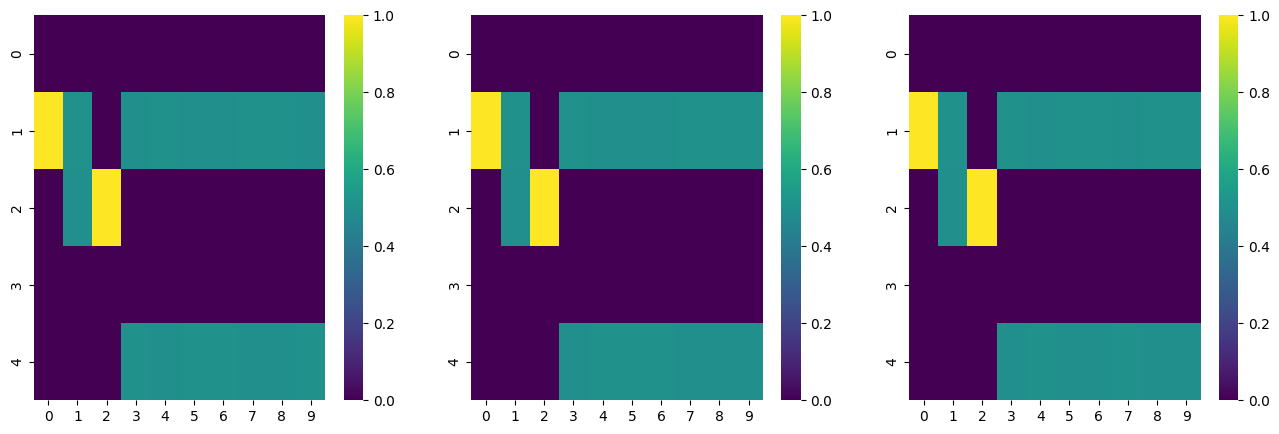

In [6]:
# plot q(u_t) for each time step
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for i in range(3):
    sns.heatmap(info['qpi'][i].T, cmap='viridis', ax=axes[i])

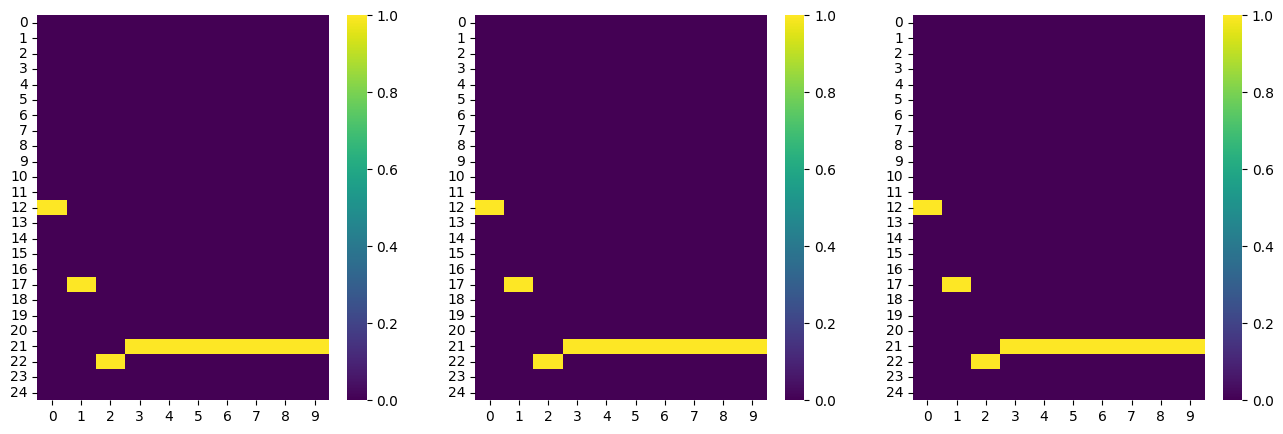

In [7]:
# plot beliefs over locations for each time steps
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for i in range(3):
    sns.heatmap(info['qs'][0][i].T, cmap='viridis', ax=axes[i])

In [8]:
ani = animate(images)

HTML(ani.to_html5_video())

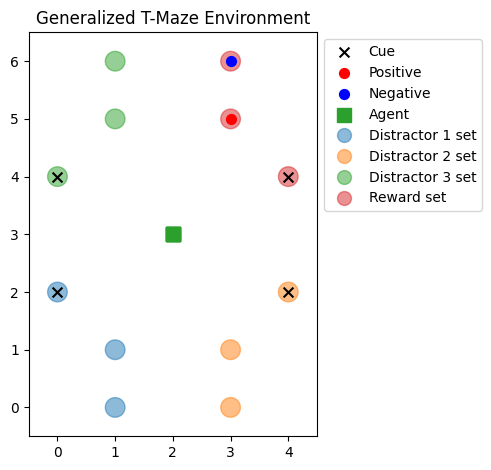

In [9]:
M = get_maze_matrix('large')
env_info_l = parse_maze(M)
tmaze_env_l = GeneralizedTMazeEnv(env_info_l, batch_size=5)
render(env_info_l, tmaze_env_l);

In [11]:
%%capture
images = [render(env_info_l, tmaze_env_l)]

timesteps = 10
key = jr.PRNGKey(0)
agent = make_aif_agent(tmaze_env_l)
_, info, _ = rollout(agent, tmaze_env_l, num_timesteps=timesteps, rng_key=key, policy_search=mcts_policy_search(max_depth=6, num_simulations=4096))

for t in range(timesteps):
    env_state = jtu.tree_map(lambda x: x[:, t], info['env'])
    plt.figure()
    images.append( np.array(render(env_info_l, env_state, show_img=False)))

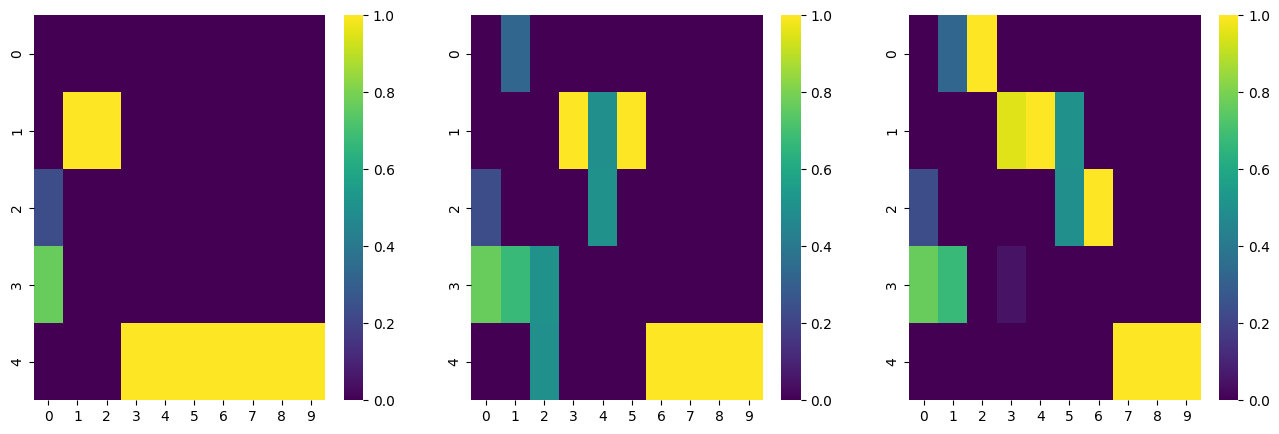

In [12]:
# plot q(u_t) for each time step
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for i in range(3):
    sns.heatmap(info['qpi'][i].T, cmap='viridis', ax=axes[i])

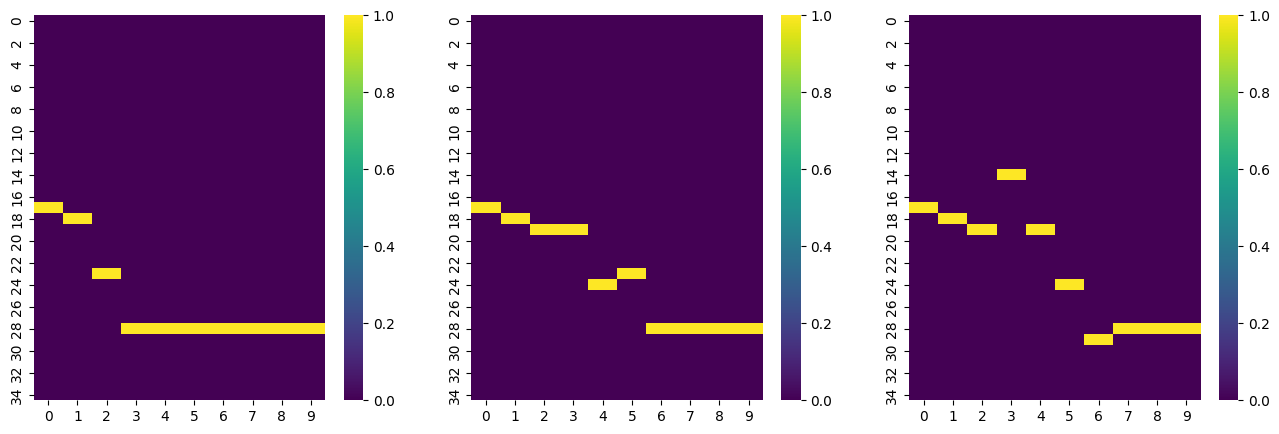

In [13]:
# plot beliefs over locations for each time step
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for i in range(3):
    sns.heatmap(info['qs'][0][i].T, cmap='viridis', ax=axes[i])

In [14]:
ani = animate(images)
HTML(ani.to_html5_video())